<a href="https://colab.research.google.com/github/johanrosesantos/Eskwelabs-T3amSiomai-Sprints/blob/main/Sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Reading File

In [83]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Eskwelabs DSFC13/Sprint 1/Data')

df = pd.read_csv("cc_clean_featureengg.csv")
holiday = pd.read_csv("holidays_2122.csv")

In [11]:
df
holiday.head()

,date,day,event,category
0,01/01/2021,Friday,New Year's Day,Regular Holiday
1,23/01/2021,Saturday,First Philippine Republic Day,Special Working Day
2,12/02/2021,Friday,Lunar New Year's Day,Special Non-working Holiday
3,14/02/2021,NaN,Valentine's Day,Retail Holiday
4,25/02/2021,Thursday,People Power Anniversary,Special Non-working Holiday


## Converting/Cleaning data format

In [91]:
# Convert acct_num to integer; date of birth and trans_datetime from object to datetime
df['acct_num'] = df['acct_num'].astype(int)
df['dob'] = pd.to_datetime(df['dob'])
df['trans_datetime'] = pd.to_datetime(df['trans_datetime'])
holiday['date'] = pd.to_datetime(holiday['date'], format='%d/%m/%Y')

In [92]:
# Correcting age and coverting to integer
current_date = pd.to_datetime("2022-01-01")
df["age"] = ((current_date - df["dob"])// pd.Timedelta(days=365.25)).astype(int)

df["age"].describe()

count    92432.000000
mean        66.443645
std         10.478605
min         51.000000
25%         58.000000
50%         65.000000
75%         72.000000
max         95.000000
Name: age, dtype: float64

# Segmentation

In [24]:
df.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime,age,time_of_day,season,is_holiday,age_bin
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31,63,afternoon,Dry,n,Baby Boomers
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,968000000000,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28,51,afternoon,Dry,n,Gen X
2,4.140000e+18,M,Calapan,133893,Financial controller,1953-07-23,628000000000,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37,68,afternoon,Dry,n,Baby Boomers
3,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,1954-01-11,257000000000,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59,67,afternoon,Rainy,n,Baby Boomers
4,3.530000e+15,M,City of Paranaque,665822,"Engineer, water",1961-07-31,540000000000,540000000000,b389cc449c9c298e8c004024449f7a27,1594960430,shopping_net,363.49,2020-07-17 12:33:50,60,afternoon,Rainy,n,Baby Boomers


## Online or Onsite

In [139]:
df['category'].unique()
online = ['shopping_net', 'travel', 'misc_net','grocery_net']
onsite = ['entertainment', 'food_dining', 'gas_transport','home', 'kids_pets','personal_care', 'grocery_pos', 'health_fitness', 'shopping_pos', 'misc_pos']

In [135]:
df['category'].unique()

array(['shopping_net', 'entertainment', 'food_dining', 'gas_transport',
       'home', 'kids_pets', nan, 'personal_care', 'grocery_pos', 'travel',
       'misc_net', 'health_fitness', 'shopping_pos', 'misc_pos',
       'grocery_net'], dtype=object)

In [145]:
def get_online(category, online):
    if category in online :
        return 'online'
    else:
        return 'onsite'

# Apply the function row-wise by using lambda to pass two columns
df['is_online'] = df.apply(lambda row: get_online(row['category'], online), axis=1)

In [149]:
df['is_online'].value_counts(normalize=True) *100

is_online
onsite    86.938506
online    13.061494
Name: proportion, dtype: float64

## Holiday or Birthday

---



In [93]:
def get_bday(trans_date, dob):
    # Compare only the month and day parts
    if trans_date.month == dob.month and trans_date.day == dob.day:
        return 'birthday spending'
    else:
        return 'no'

# Apply the function row-wise by using lambda to pass two columns
df['is_birthday'] = df.apply(lambda row: get_bday(row['trans_datetime'], row['dob']), axis=1)

In [94]:
holiday['date'].describe()

count                               70
mean     2020-12-21 16:06:51.428571392
min                2020-01-01 00:00:00
25%                2020-06-14 06:00:00
50%                2020-12-24 00:00:00
75%                2021-05-07 00:00:00
max                2021-12-31 00:00:00
Name: date, dtype: object

In [109]:
def get_hol_bday(row, holiday_dates):
    trans_date = row['trans_datetime'].date()  # Extract date part
    dob = row['dob'].date()  # Extract date part

    # Check if the transaction date is the same as the date of birth (birthday)
    if trans_date.month == dob.month and trans_date.day == dob.day:
        return 'Birthday'
    # Check if the transaction date matches any date in the holiday dates
    elif trans_date in holiday_dates:
        return 'Holiday'
    else:
        return 'No'

# Convert holiday dates to datetime.date objects for consistency
holiday_dates = [date.date() for date in holiday['date']]

# Apply the function row-wise by using lambda to pass each row and holiday dates
df['is_holi_bday'] = df.apply(lambda row: get_hol_bday(row, holiday_dates), axis=1)

In [121]:
df['is_holi_bday'].value_counts(normalize=True) * 100

is_holi_bday
No          90.665570
Holiday      9.020685
Birthday     0.313744
Name: proportion, dtype: float64

## Holiday or  Birthday Week

In [187]:
def get_hb_week(row, holiday_dates):
    trans_date = row['trans_datetime'].date()  # Extract date part
    dob = row['dob'].date()  # Extract date part

    # Define the start and end dates for the birthday week
    birthday_start = dob - datetime.timedelta(days=2)
    birthday_end = dob
    # Check if the transaction date falls within the birthday week
    if birthday_start <= trans_date <= birthday_end:
        return 'Yes'
    for holiday_date in holiday_dates:
        holiday_start = holiday_date - datetime.timedelta(days=2)
        holiday_end = holiday_date
        if holiday_start <= trans_date <= holiday_end:
            return 'Yes'
        elif trans_date == holiday_date:
            return 'Yes'

    return 'No'

# Convert holiday dates to datetime.date objects for consistency
holiday_dates = [date.date() for date in holiday['date']]

# Apply the function row-wise by using lambda to pass each row and holiday dates
df['is_hb_week'] = df.apply(lambda row: get_hb_week(row, holiday_dates), axis=1)

In [188]:
df['is_hb_week'].value_counts(normalize=True) * 100

is_hb_week
No     78.351653
Yes    21.648347
Name: proportion, dtype: float64

### Visualizing

### Total Volume


In [ ]:
df.groupby('time_of_day').size().sort_values(ascending=True)

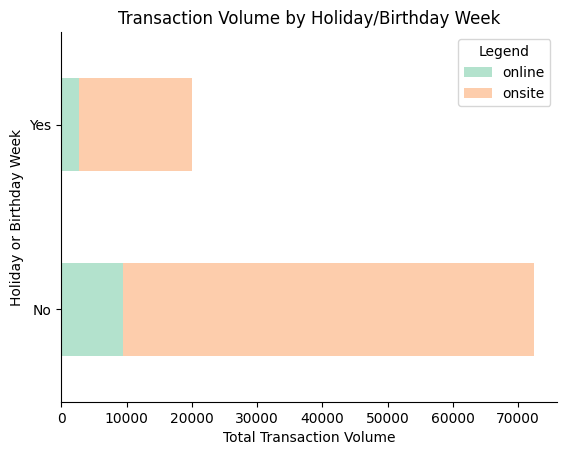

In [189]:
grouped_hbw_vol = df.groupby(['is_hb_week', 'is_online']).size()
grouped_hbw_vol = grouped_hbw_vol.unstack()

grouped_hbw_vol.plot(kind='barh', stacked=True, color=sns.color_palette("Pastel2",3))

# Remove top and right spines
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Add labels and title
plt.xlabel('Total Transaction Volume')
plt.ylabel('Holiday or Birthday Week')
plt.title('Transaction Volume by Holiday/Birthday Week')
plt.legend(title='Legend')

### Total Spending

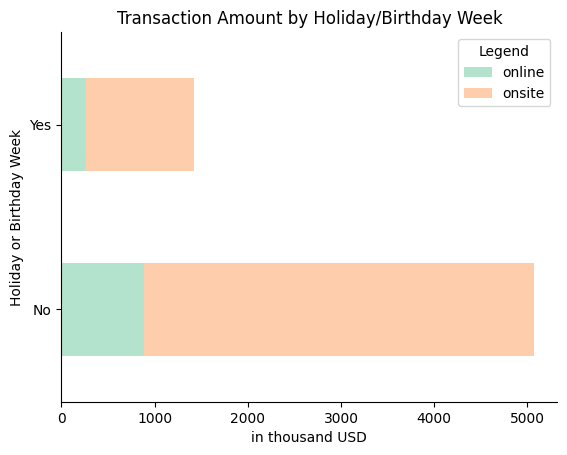

In [190]:
grouped_hbw_total = df.groupby(['is_hb_week', 'is_online'])['amt'].sum()/1000
grouped_hbw_total = grouped_hbw_total.unstack()

grouped_hbw_total.plot(kind='barh', stacked=True, color=sns.color_palette("Pastel2",3))

# Remove top and right spines
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Add labels and title
plt.xlabel('in thousand USD')
plt.ylabel('Holiday or Birthday Week')
plt.title('Transaction Amount by Holiday/Birthday Week')
plt.legend(title='Legend')

### Average Spending

Text(0.5, 1.0, 'Transaction Amount by Holiday/Birthday Week')

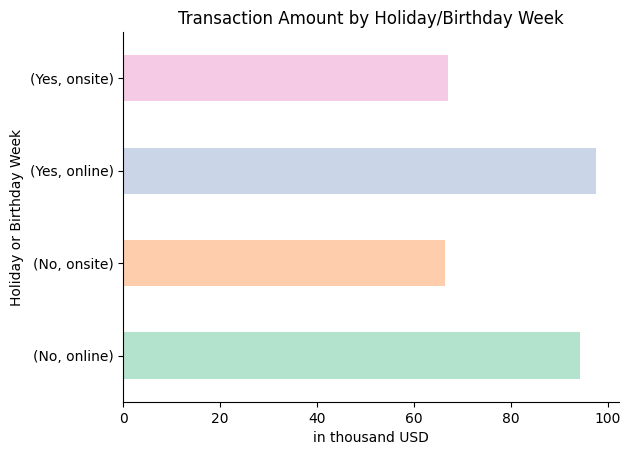

In [191]:
grouped_hbw_ave = df.groupby(['is_hb_week', 'is_online'])['amt'].mean()

grouped_hbw_ave.plot(kind='barh', stacked=True, color=sns.color_palette("Pastel2", 5))

# Remove top and right spines
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Add labels and title
plt.xlabel('in thousand USD')
plt.ylabel('Holiday or Birthday Week')
plt.title('Transaction Amount by Holiday/Birthday Week')

## Adulthood Phase
* Early adulthood (18–39)
* Middle adulthood (40–59)
* Young old (60–75)
* Old old (75 and up)

In [126]:
bins = [-np.Inf,17,39,59,75,np.Inf]
labels = ["MINORS","EARLY_ADULTHOOD","MIDDLE_ADULTHOOD","YOUNG_OLD","OLD_OLD"]

df["age_group"] = pd.cut(df['age'],
                        bins=bins,
                        labels=labels,
                        right=True) #Silent: (-inf,1945], BabyB: (1945,1964]

In [127]:
df['trans_datetime'].min(),df['trans_datetime'].max()

(Timestamp('2020-01-01 08:06:15'), Timestamp('2021-12-07 07:50:42'))

## Time of Day
* Early Morning: 12:00 AM - 6:00 AM
* Morning: 6:00 AM - 11:00 AM
* Afternoon: 11:00 AM - 5:00 PM
* Evening: 5:00 PM - 9:00 PM
* Late Night: 9:00 PM - 12:00 AM


In [125]:
def get_time_of_day(hour):
    if hour < 6:
        return 'early morning'
    elif hour < 12:
        return 'morning'
    elif hour < 17:
        return 'afternoon'
    elif hour < 21:
        return 'evening'
    else:
        return 'late night'

In [126]:
df['time_of_day'] = (df['trans_datetime'].dt.hour).apply(get_time_of_day)
df['time_of_day'].value_counts(normalize=True) *100

time_of_day
morning          26.850009
afternoon        24.859356
early morning    20.154276
evening          18.176606
late night        9.959754
Name: proportion, dtype: float64

### Visualizing

Text(0.5, 1.0, 'Transaction Volume by Time of Day')

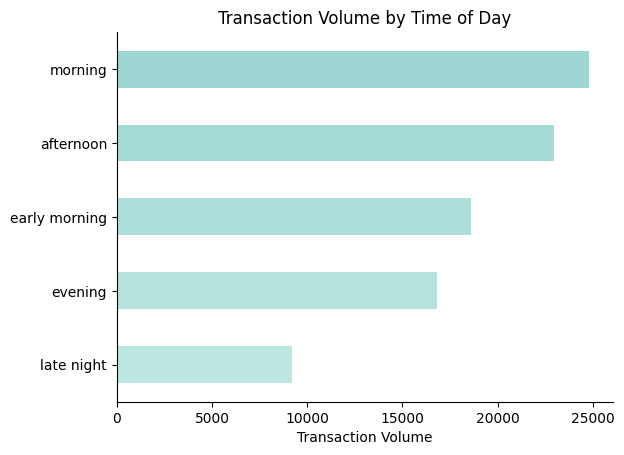

In [127]:
df.groupby('time_of_day').size().sort_values(ascending=True).plot(kind='barh', color = sns.color_palette("ch:rot=-.25,hue=1,dark=.75"))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Add labels and title
plt.xlabel('Transaction Volume')
plt.ylabel('')
plt.title('Transaction Volume by Time of Day')

Text(0.5, 1.0, 'Transaction Amount by Time of Day')

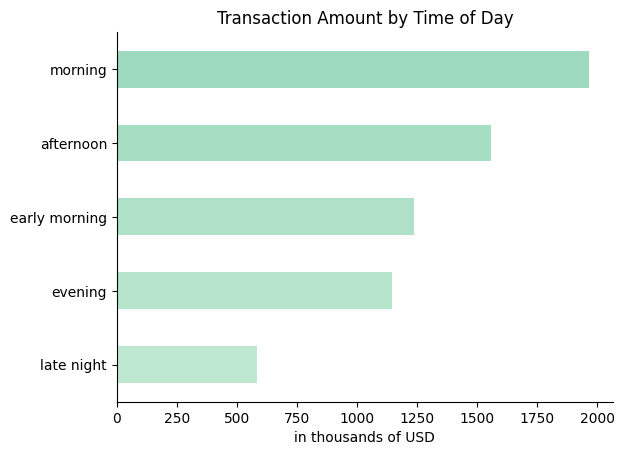

In [128]:
amount_tod = df.groupby('time_of_day')['amt'].sum()/1000

amount_tod.sort_values(ascending=True).plot(kind='barh', color = sns.color_palette("ch:rot=-.35,hue=1,dark=.75"))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Add labels and title
plt.xlabel('in thousands of USD')
plt.ylabel('')
plt.title('Transaction Amount by Time of Day')

In [129]:
grouped_tod = df.groupby(['time_of_day', 'age_group'])['amt'].sum().unstack()

y_order = ['early morning','morning', 'afternoon', 'evening', 'late night']
grouped_tod = grouped_tod.loc[y_order]

grouped_tod.plot(kind='barh', stacked=True, color=sns.color_palette("Pastel2",3)).invert_yaxis()

# Remove top and right spines
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Add labels and title
plt.xlabel('Time of Day')
plt.ylabel('Total Transaction Amount')
plt.title('Total Transaction Amount by Time of Day')

# Remove specific labels from the legend
handles, labels = ax.get_legend_handles_labels()
to_remove = ['MINORS','EARLY_ADULTHOOD']  # Labels to remove from the legend
handles = [h for h, label in zip(handles, labels) if label not in to_remove]
labels = [label for label in labels if label not in to_remove]
ax.legend(handles, labels, title='Legend')

KeyError: 'age_group'

In [ ]:
grouped_atod = df.groupby(['time_of_day', 'age_group'])['amt'].sum().unstack()

grouped_atod.plot(kind='barh', stacked=True, color=sns.color_palette("Pastel2",3))

# Remove top and right spines
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Add labels and title
plt.xlabel('Time of Day')
plt.ylabel('Total Transaction Amount')
plt.title('Total Transaction Amount by Time of Day')

# Remove specific labels from the legend
handles, labels = ax.get_legend_handles_labels()
to_remove = ['MINORS','EARLY_ADULTHOOD']  # Labels to remove from the legend
handles = [h for h, label in zip(handles, labels) if label not in to_remove]
labels = [label for label in labels if label not in to_remove]
ax.legend(handles, labels, title='Legend')

## Working Hours or Not

In [29]:
def get_workhours(hour):
    if 8 <= hour <= 18:
        return 'Within Workhours'
    else:
        return 'Not Workhours'

In [30]:
df['is_workhours'] = (df['trans_datetime'].dt.hour).apply(get_workhours)
df['is_workhours'].value_counts(normalize=True)

is_workhours
Within Workhours    0.547375
Not Workhours       0.452625
Name: proportion, dtype: float64

### Visualizing

Text(0.5, 1.0, 'Transaction Volume per Hour')

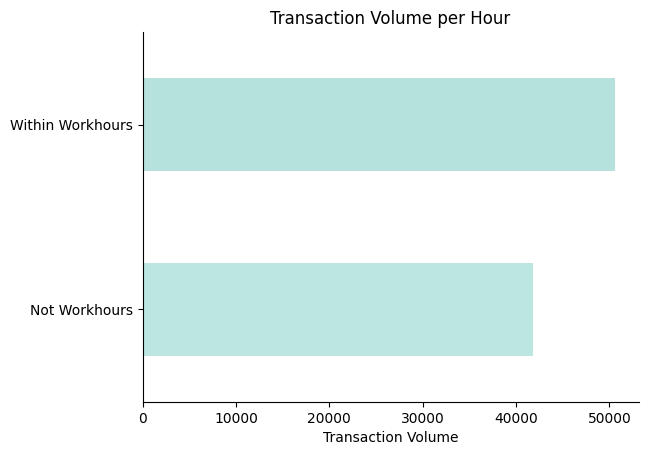

In [31]:
df.groupby('is_workhours').size().plot(kind='barh', color = sns.color_palette("ch:rot=-.25,hue=1,dark=.75"))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Add labels and title
plt.xlabel('Transaction Volume')
plt.ylabel('')
plt.title('Transaction Volume per Hour')

In [114]:
df

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,...,amt,trans_datetime,age,time_of_day,season,is_holiday,age_bin,age_group,is_workhours,trans_hour
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,...,68.88,2020-02-10 13:53:31,63,afternoon,Dry,n,Baby Boomers,YOUNG_OLD,Within Workhours,12:00 NN-3:00 PM
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,968000000000,968000000000,060d12f91c13871a13963041736a4702,1590902968,...,50.06,2020-05-31 13:29:28,51,afternoon,Dry,n,Gen X,MIDDLE_ADULTHOOD,Within Workhours,12:00 NN-3:00 PM
2,4.140000e+18,M,Calapan,133893,Financial controller,1953-07-23,628000000000,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,...,105.44,2020-03-29 13:52:37,68,afternoon,Dry,n,Baby Boomers,YOUNG_OLD,Within Workhours,12:00 NN-3:00 PM
3,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,1954-01-11,257000000000,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,...,82.69,2020-09-28 16:35:59,67,afternoon,Rainy,n,Baby Boomers,YOUNG_OLD,Within Workhours,3:00 PM-6:00 PM
4,3.530000e+15,M,City of Paranaque,665822,"Engineer, water",1961-07-31,540000000000,540000000000,b389cc449c9c298e8c004024449f7a27,1594960430,...,363.49,2020-07-17 12:33:50,60,afternoon,Rainy,n,Baby Boomers,YOUNG_OLD,Within Workhours,9:00 AM-12:00 NN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92427,3.530000e+15,M,Dasmarinas,659019,"Physicist, medical",1965-03-26,201000000000,201000000000,4f77498d91283c4910a636b2e8149dda,1587273415,...,6.54,2020-04-19 13:16:55,56,afternoon,Dry,n,Gen X,MIDDLE_ADULTHOOD,Within Workhours,12:00 NN-3:00 PM
92428,2.470000e+15,M,San Fernando,306659,"Surveyor, quantity",1935-11-01,581100000000,581000000000,d44f411eabd406a76a60546e723a98fd,1628185569,...,98.23,2021-08-06 01:46:09,86,early morning,Rainy,n,The Silent Generation,OLD_OLD,Not Workhours,0:00 AM-3:00 AM
92429,3.520000e+15,M,Masbate,95389,Wellsite geologist,1967-11-20,531000000000,531000000000,7e767a74cae901c13f1a9d1d37aa63d4,1621481285,...,78.79,2021-05-20 11:28:05,54,morning,Dry,n,Gen X,MIDDLE_ADULTHOOD,Within Workhours,9:00 AM-12:00 NN
92430,4.620000e+15,M,San Fernando,121812,Personnel officer,1934-11-20,555000000000,555000000000,6ced184c93e66028e8d235ad3060de90,1625341374,...,31.37,2021-07-04 03:42:54,87,early morning,Rainy,n,The Silent Generation,OLD_OLD,Not Workhours,0:00 AM-3:00 AM


In [ ]:
grouped_tod = df.groupby(['time_of_day', 'age_group'])['amt'].sum().unstack()

y_order = ['early morning','morning', 'afternoon', 'evening', 'late night']
grouped_tod = grouped_tod.loc[y_order]

grouped_tod.plot(kind='barh', stacked=True, color=sns.color_palette("Pastel2",3)).invert_yaxis()

# Remove top and right spines
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Add labels and title
plt.xlabel('Time of Day')
plt.ylabel('Total Transaction Amount')
plt.title('Total Transaction Amount by Time of Day')

# Remove specific labels from the legend
handles, labels = ax.get_legend_handles_labels()
to_remove = ['MINORS','EARLY_ADULTHOOD']  # Labels to remove from the legend
handles = [h for h, label in zip(handles, labels) if label not in to_remove]
labels = [label for label in labels if label not in to_remove]
ax.legend(handles, labels, title='Legend')

Text(0.5, 1.0, 'Transaction Amount during Workhours')

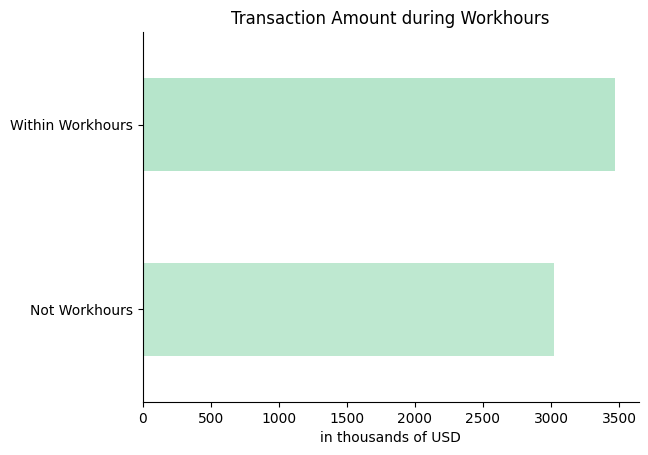

In [43]:
amount_wh = df.groupby('is_workhours')['amt'].sum() /1000
amount_wh.sort_values(ascending=True).plot(kind='barh', color = sns.color_palette("ch:rot=-.35,hue=1,dark=.75"))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Add labels and title
plt.xlabel('in thousands of USD')
plt.ylabel('')
plt.title('Transaction Amount during Workhours')

## Transaction by Hour

In [38]:
bins = [-np.Inf,3,6,9,12,15,18,21,np.Inf]
labels = ["0:00 AM-3:00 AM","3:00 AM-6:00 AM","6:00 AM-9:00 AM","9:00 AM-12:00 NN",
          "12:00 NN-3:00 PM","3:00 PM-6:00 PM","6:00 PM-9:00 PM","9:00 PM-12:00 MN"]

df["trans_hour"] = pd.cut(df['trans_datetime'].dt.hour,
                        bins=bins,
                        labels=labels,
                        right=True)

In [39]:
df['trans_hour'].value_counts(normalize=True) *100

trans_hour
9:00 AM-12:00 NN    15.081357
3:00 PM-6:00 PM     14.959105
12:00 NN-3:00 PM    14.877964
0:00 AM-3:00 AM     13.554829
6:00 AM-9:00 AM     13.422841
6:00 PM-9:00 PM     11.466808
3:00 AM-6:00 AM     10.017094
9:00 PM-12:00 MN     6.620002
Name: proportion, dtype: float64

### Visualizing

Text(0.5, 1.0, 'Transaction Volume per Hour')

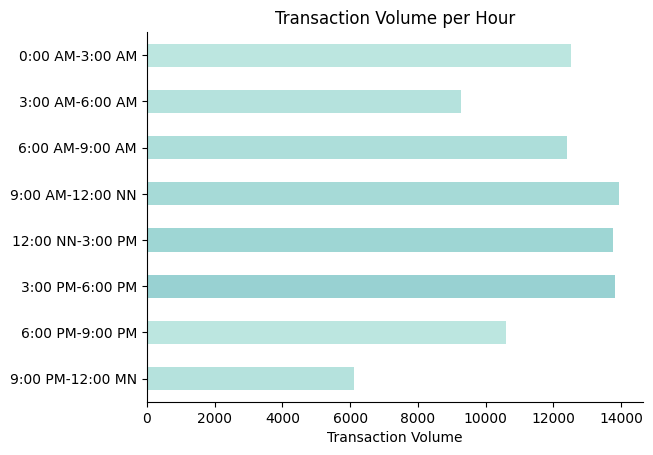

In [40]:
df.groupby('trans_hour').size().plot(kind='barh', color = sns.color_palette("ch:rot=-.25,hue=1,dark=.75")).invert_yaxis()
plt.gca().spines[['top', 'right',]].set_visible(False)

# Add labels and title
plt.xlabel('Transaction Volume')
plt.ylabel('')
plt.title('Transaction Volume per Hour')

Text(0.5, 1.0, 'Transaction Amount per Hour of Day')

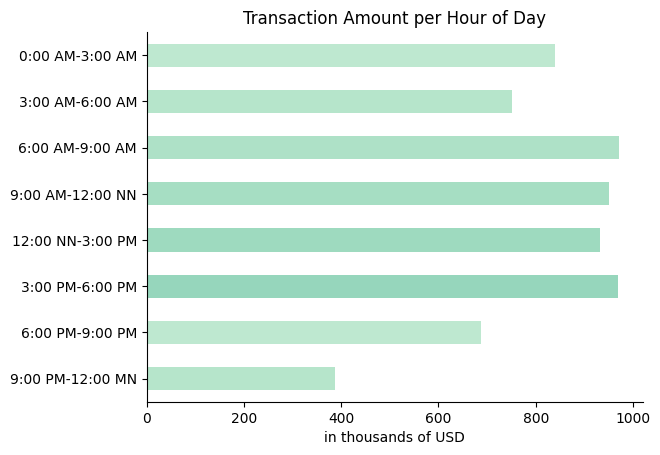

In [45]:
amount_hr = df.groupby('trans_hour')['amt'].sum() /1000
amount_hr.plot(kind='barh', color = sns.color_palette("ch:rot=-.35,hue=1,dark=.75")).invert_yaxis()
plt.gca().spines[['top', 'right',]].set_visible(False)

# Add labels and title
plt.xlabel('in thousands of USD')
plt.ylabel('')
plt.title('Transaction Amount per Hour of Day')

# Saving csv file

In [46]:
df.to_csv('timeofday.csv', index=False)